In [ ]:


# ANALYZE VOLATILITY in "analyze_volatility.py"

In [3]:
#DOWNLOAD AND SHOW OUTPUT FROM TOTAL MULTIPROCESSING
# SHOW OUTPUT FROM VOLATILITY ANALYSIS

import sys
sys.path.insert(0,'..')
from Functions import download_show_output
from Helpers import filter_complete_info_by_current_eventkeys
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', None)

minimum_event_number = 1
minimum_event_number_list = [minimum_event_number]
mean_threshold = -10
frequency_threshold = 0
std_multiplier = 10
early_validation = False
# file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-sell-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-sell-10-250-highfrequency.json"]
KEEP_PRODUCTION_ANALYSIS = False
if KEEP_PRODUCTION_ANALYSIS:
    file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/analysis.json"]
else:
    analysis_name = 'analysis-nobuyvolume-3'
    file_paths = [f"/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/{analysis_name}.json"]

start_analysis= datetime(2024,1,1)
early_validation = datetime(2026,1,1)
xth_percentile=100
filter_field='mean'
filter_position=200
output, complete_info, daily_events = download_show_output(minimum_event_number=minimum_event_number,mean_threshold=mean_threshold, frequency_threshold=frequency_threshold,
                                              early_validation=early_validation, std_multiplier=std_multiplier, file_paths=file_paths,
                                                start_analysis=start_analysis, DELETE_99_PERCENTILE=True, filter_field=filter_field, xth_percentile=xth_percentile, filter_position=filter_position)


#output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)

df = pd.DataFrame(output).transpose()
n_event_keys = len(df['mean'])
print(f'Number of event_keys: {n_event_keys}')
daily_frequency_all_events = int(sum(df['frequency/month']) / 30)
print(f'Daily frequency of events: {daily_frequency_all_events}')

df.sort_values(by=['median_max'], ascending=False)

#df.sort_values(by=['lower_bound'], ascending=False)

Number of event_keys: 12
Daily frequency of events: 15


,mean,std,max,min,median_max,median_min,standings,n_coins,n_events,upper_bound,lower_bound,frequency/month
buy_vol_15m:0/vol_15m:18/timeframe:1440/lvl:200,1.14,5.29,11.28,-6.69,5.87,-5.30,119.16,247.0,1359.0,6.43,-4.15,55.77
buy_vol_15m:0/vol_15m:12/timeframe:1440/lvl:125,1.69,5.07,10.49,-5.76,5.76,-4.29,71.70,167.0,1256.0,6.76,-3.38,51.55
buy_vol_5m:0/vol_5m:30/timeframe:1440/lvl:200,1.25,5.18,10.94,-6.36,5.66,-4.92,123.35,247.0,1402.0,6.43,-3.93,57.54
buy_vol_5m:0/vol_5m:20/timeframe:1440/lvl:125,1.72,4.95,10.19,-5.47,5.20,-4.00,73.49,170.0,1294.0,6.67,-3.23,53.11
buy_vol_1m:0/vol_1m:75/timeframe:1440/lvl:200,1.10,4.95,10.18,-6.04,5.02,-4.56,128.52,236.0,1230.0,6.05,-3.85,50.48
buy_vol_1m:0/vol_1m:50/timeframe:1440/lvl:125,1.14,4.96,9.32,-5.68,4.57,-4.25,77.12,166.0,1166.0,6.10,-3.82,47.85
buy_vol_15m:0/vol_15m:7/timeframe:1440/lvl:50,0.97,3.64,7.60,-5.20,4.48,-3.60,26.77,77.0,853.0,4.61,-2.67,35.01
buy_vol_1m:0/vol_1m:25/timeframe:1440/lvl:50,1.01,3.33,7.00,-4.63,4.27,-3.08,28.36,75.0,919.0,4.34,-2.32,37.72
buy_vol_5m:0/vol_5m:10/timeframe:1440/lvl:50,1.07,3.43,7.23,-4.76,4.24,-3.36,26.74,77.0,1049.0,4.50,-2.36,43.05
buy_vol_5m:0/vol_5m:5/timeframe:1440/lvl:10,1.04,2.73,5.37,-3.43,3.30,-2.04,5.37,18.0,353.0,3.77,-1.69,14.49


In [4]:
daily_events

{'2024-01-01': 36,
 '2024-01-02': 50,
 '2024-01-03': 104,
 '2024-01-04': 39,
 '2024-01-05': 53,
 '2024-01-06': 26,
 '2024-01-07': 25,
 '2024-01-08': 50,
 '2024-01-09': 55,
 '2024-01-10': 48,
 '2024-01-11': 45,
 '2024-01-12': 50,
 '2024-01-13': 17,
 '2024-01-14': 24,
 '2024-01-15': 32,
 '2024-01-16': 38,
 '2024-01-17': 33,
 '2024-01-18': 46,
 '2024-01-19': 30,
 '2024-01-20': 25,
 '2024-01-21': 27,
 '2024-01-22': 46,
 '2024-01-23': 54,
 '2024-01-24': 24,
 '2024-01-25': 34,
 '2024-01-26': 35,
 '2024-01-27': 24,
 '2024-01-28': 36,
 '2024-01-29': 46,
 '2024-01-30': 49,
 '2024-01-31': 27,
 '2024-02-01': 31,
 '2024-02-02': 37,
 '2024-02-03': 34,
 '2024-02-04': 31,
 '2024-02-05': 44,
 '2024-02-07': 47,
 '2024-02-08': 52,
 '2024-02-09': 62,
 '2024-02-10': 55,
 '2024-02-11': 64,
 '2024-02-12': 76,
 '2024-02-13': 85,
 '2024-02-14': 92,
 '2024-02-15': 107,
 '2024-02-16': 80,
 '2024-02-17': 78,
 '2024-02-18': 62,
 '2024-02-19': 94,
 '2024-02-20': 132,
 '2024-02-21': 54,
 '2024-02-22': 67,
 '2024-02

In [ ]:
# from Helpers import filter_complete_info_by_current_eventkeys
# output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)


In [ ]:
from Helpers import create_strategy_configuration
strategy_configuration_parameters =  {
        'strategy_jump': 0.04,
        'limit': 0.25,
        'price_change_jump': 0.025,
        'max_limit': 0.2,
        'price_drop_limit': 0.05,
        'distance_jump_to_current_price': 0.01,
        'max_ask_order_distribution_level': 0.1,
        'last_i_ask_order_distribution': 1,
        'min_n_obs_jump_level': 5
    }
create_strategy_configuration(strategy_configuration_parameters)

In [ ]:
from Helpers import frequency_events_analysis
frequency_events_analysis(complete_info)


In [ ]:
from Analysis2023.Functions import check_investment_amount
check_investment_amount(complete_info, output, investment_amount=150)

In [ ]:
from Helpers import get_timeseries
from Helpers import get_analysis


output, complete_info = get_analysis()
event_keys_filter = []
check_past=180 #minutes before event trigger
check_future=1440 #minutes after the end of event (usually after 1 days from event trigger)


info_strategy = {
        'strategy_jump': 0.04, #jump from price levels in terms of cumulative volume order (from 0 to 1)
        'limit': 0.25, #get the window of price change (from 0 to 1) (e.g. 0.15 check only the orders whose level is within 15% price change from current price)
        'price_change_jump': 0.025, #range of price change (used in get_price_levels for bid/ask_order_distribution)
        'max_limit': 0.2,  #what is the max change, beyond that I won't consider triggers ---> ( max_price - initial_price ) / initial_price
        'price_drop_limit': 0.025, #current drop from max. The minimum drop from the maximum for triggering events ---> abs( (current_price - max_price) / max_price )
        'buy_duration': 12,
        'stop_loss_limit': "None",
        'distance_jump_to_current_price': 0.1, # minimum distance from jump
        'max_ask_od_level': 0.05, # max percentage of ask volume at the first level (level is based on price_change_jump)
        'last_i_ask_od': 1, # how many last order distribution obs I consider, an np.mean is executed
        'min_n_obs_jump_level': 5,
        'lvl': 2 #n_orderbook_levels
    }
save_plot=False
analyze=True
#event_keys_filter = ['buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50', 'buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150']
#get_timeseries(complete_info, check_past=check_past, check_future=check_future, info_strategy=info_strategy, save_plot=save_plot, analyze=analyze)


BUY-EVENT: n_ask_order: 1
Gain: -0.95 -dt_buy: 2025-01-31T18:39:00 - max_change_buy: 0.71 - min_change_buy: -1.21 - dt_max_change_buy: 1:17:00 - dt_min_change_buy: 4:57:00


/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Deleting 3 duplicates from initial 15 events
Number Buy Events: pre deletion: 15, post deletion: 12.
Number Total Events: pre deletion: 1101, post deletion: 1098.


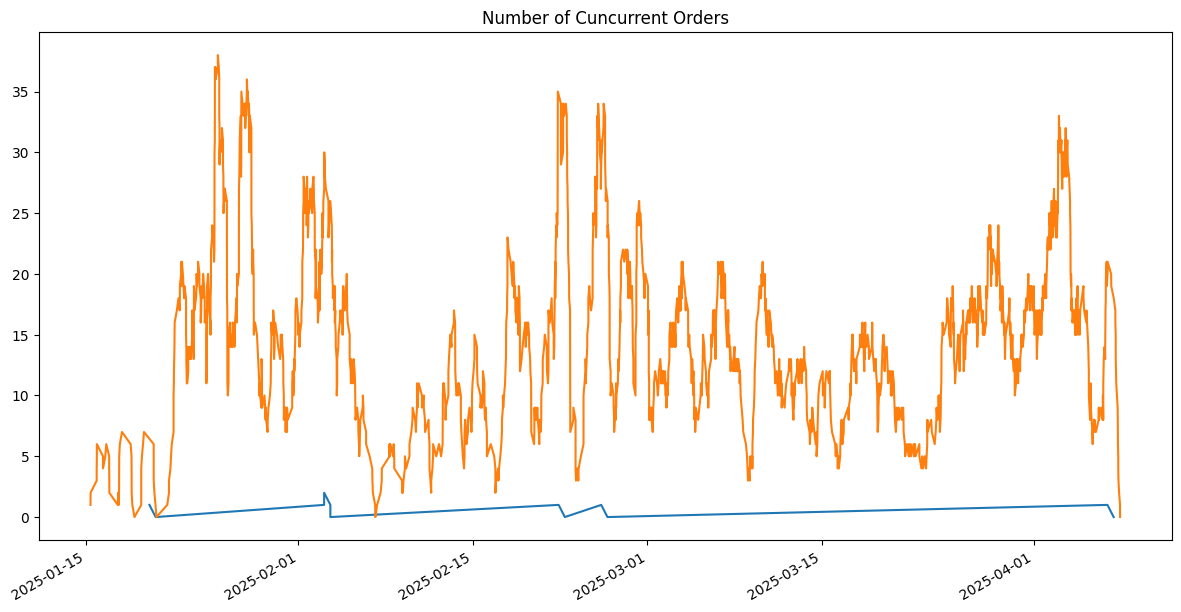

/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/benchmark-18-4-2025 does not exist. Making the request to the server..
StatusCode for getting get-benchmarkinfo: 200
/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/benchmark-18-4-2025 exists. Loading the file...
/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/volume_standings_2025-4-19.json does not exist


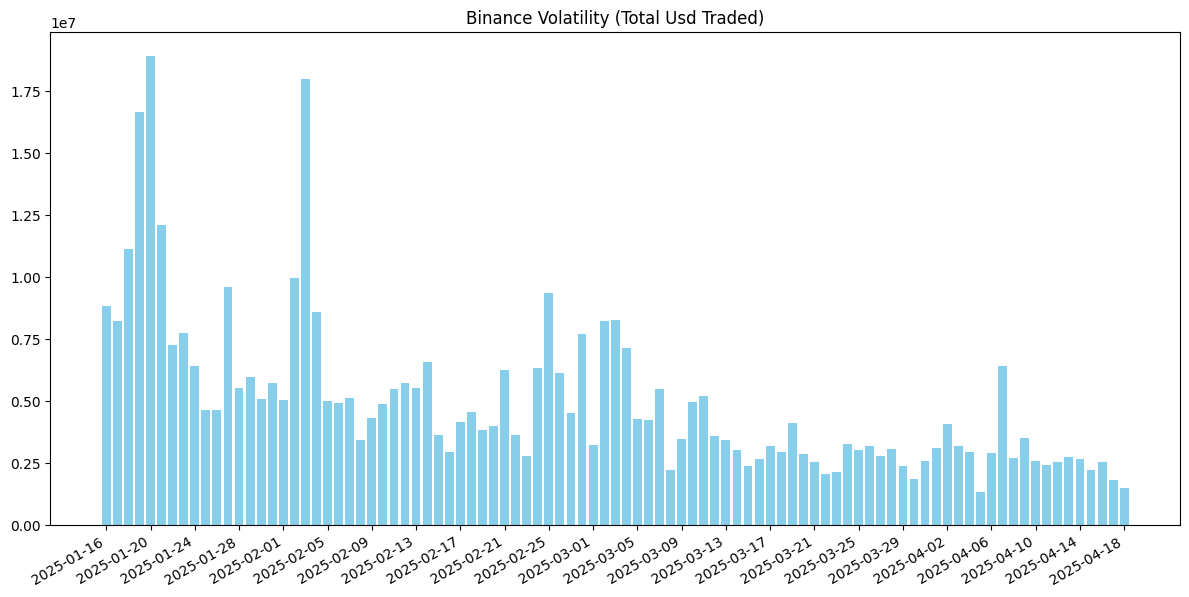

svolume standings is up to date, loading then..
Last date saved: 2025-04-08
11 days, 21:18:41.652293
Data Download from 2025-04-08T00:00:00 + 7days


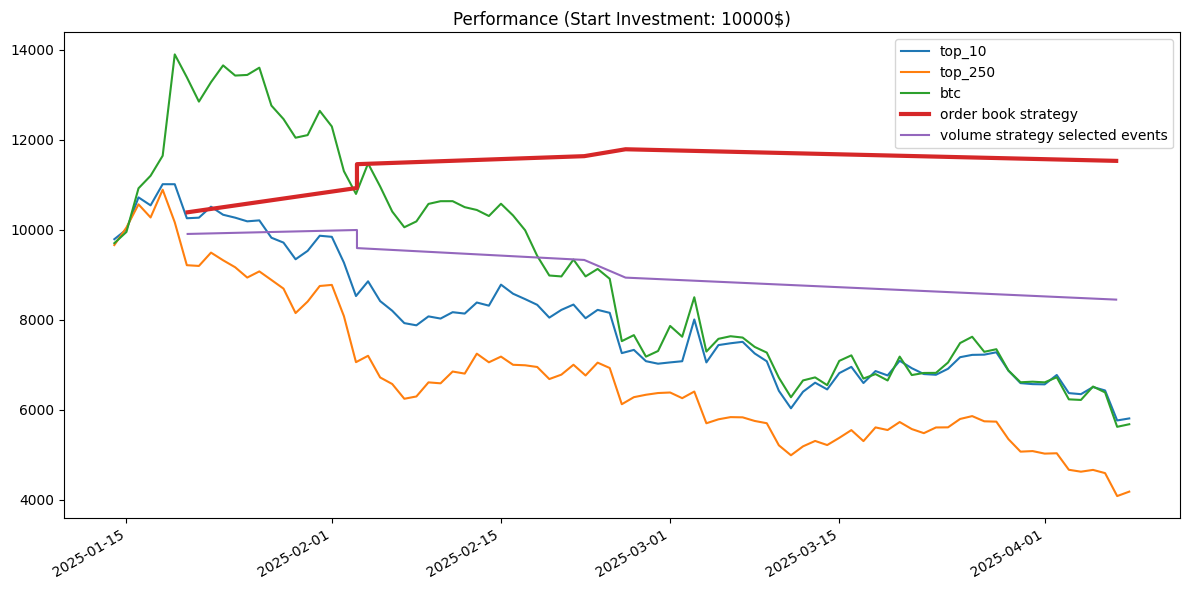

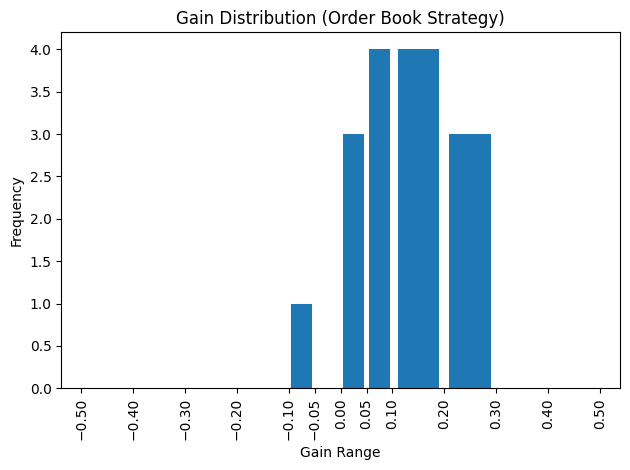

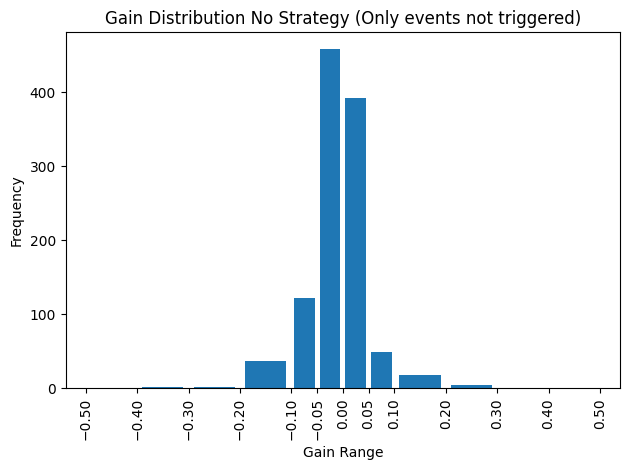

Initial Investment: 10000$
Invesment per event: 5000.0$
Commission: 42.75$
Total Investment 30000.0
Average Profit per event: 5.24%
Profit: 1530.25$
Total Observations Under Analysis: 1098
Total Events triggered by strategy: 6
1098


In [2]:
from Helpers import plot_strategy_result
info_strategy = {
        'strategy_jump': 0.04, #jump from price levels in terms of cumulative volume order (from 0 to 1)
        'limit': 0.25, #get the window of price change (from 0 to 1) (e.g. 0.15 check only the orders whose level is within 15% price change from current price)
        'price_change_jump': 0.025, #range of price change (used in get_price_levels for bid/ask_order_distribution)
        'max_limit': 0.2,  #what is the max change, beyond that I won't consider triggers ---> ( max_price - initial_price ) / initial_price
        'price_drop_limit': 0.05, #current drop from max. The minimum drop from the maximum for triggering events ---> abs( (current_price - max_price) / max_price )
        'buy_duration': 12,
        'stop_loss_limit': "None",
        'distance_jump_to_current_price': 0.01, # minimum distance from jump
        'max_ask_od_level': 0.05, # max percentage of ask volume at the first level (level is based on price_change_jump)
        'last_i_ask_od': 3, # how many last order distribution obs I consider, an np.mean is executed
        'min_n_obs_jump_level': 5,
        'lvl': 1 #n_orderbook_levels
    }
info_strategy = None
limit_n_transactions = 1
minimal = False
strategy="strategy_jump=0.04_limit=0.25_price_change_jump=0.025_max_limit=0.1_price_drop_limit=0.1_buy_duration=12_stop_loss_limit=None_distance_jump_to_current_price=0.01_max_ask_od_level=0.05_last_i_ask_od=1_min_n_obs_jump_level=5_lvl=3"
response = plot_strategy_result(info_strategy, limit_n_transactions, minimal=minimal, strategy=strategy)
if not minimal:
    df_events_overview = response[0]
    df_event_keys_overview = response[1]
    df_event_keys_overview.sort_values(by=['gain'], ascending=False)
else:
    print(response)

In [3]:
df_events_overview

,Timestamp Buy,Timestamp Sell,Balance,Coin,Profit,Investment,Profit_vol_strat,max,min,Initial Price,Buy Price,Sell price
0,2025-01-20T01:35:00,2025-01-20T13:35:00,10387.375,ONEUSDT,7.89,10387.375,-1.743097,7.83,-10.89,0.02351,0.02142,0.02311
1,2025-02-03T01:56:00,2025-02-03T13:56:00,10927.750,RAYUSDT,10.95,10927.750,1.897003,15.52,-23.52,5.57300,4.62100,5.12700
2,2025-02-03T01:56:00,2025-02-03T13:56:00,11457.125,GALAUSDT,10.73,11457.125,-7.899633,2.58,-28.15,0.02405,0.01882,0.02084
3,2025-02-21T21:26:00,2025-02-22T09:26:00,11635.000,AEVOUSDT,3.70,11635.000,-5.130728,0.23,-10.59,0.17090,0.15390,0.15960
4,2025-02-25T07:26:00,2025-02-25T19:26:00,11788.375,WBETHUSDT,3.21,11788.375,-7.712142,0.77,-13.12,2857.48000,2486.48000,2566.34000
5,2025-04-06T22:01:00,2025-04-07T10:02:00,11530.250,XVSUSDT,-5.02,11530.250,-9.637789,0.99,-16.24,5.05000,4.58000,4.35000


In [ ]:
from Helpers import get_plots
from IPython.display import Image, display
left_gain = 0
right_gain = 1
buy_events=True
info_strategy = {
        'strategy_jump': 0.04, #jump from price levels in terms of cumulative volume order (from 0 to 1)
        'limit': 0.25, #get the window of price change (from 0 to 1) (e.g. 0.15 check only the orders whose level is within 15% price change from current price)
        'price_change_jump': 0.025, #range of price change (used in get_price_levels for bid/ask_order_distribution)
        'max_limit': 0.2,  #what is the max change, beyond that I won't consider triggers ---> ( max_price - initial_price ) / initial_price
        'price_drop_limit': 0.05, #current drop from max. The minimum drop from the maximum for triggering events ---> abs( (current_price - max_price) / max_price )
        'distance_jump_to_current_price': 0.01, # minimum distance from jump
        'max_ask_order_distribution_level': 0.05, # max percentage of ask volume at the first level (level is based on price_change_jump)
        'last_i_ask_order_distribution': 1, # how many last order distribution obs I consider, an np.mean is executed
        'min_n_obs_jump_level': 5
    }
paths_png = get_plots(left_gain, right_gain, buy_events)


In [ ]:
from Helpers import get_top_crypto

response, list_datetime = get_top_crypto()
response

In [ ]:
# CREATE A GRAPH FOR VOLATILITY AND NUMBER OF OBSERVATIONS

# START TO ANALYZE ASK PRICE-LEVELS ABOVE 2.5%


In [6]:
from Helpers import get_benchmark_info, load_volume_standings
benchmark_json, df_benchmark, volatility = get_benchmark_info()
volume_standings = load_volume_standings()



/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/benchmark-6-3-2025 exists. Loading the file...
svolume standings is up to date, loading then..


/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/benchmark-20-3-2025 exists. Loading the file...
svolume standings is up to date, loading then..


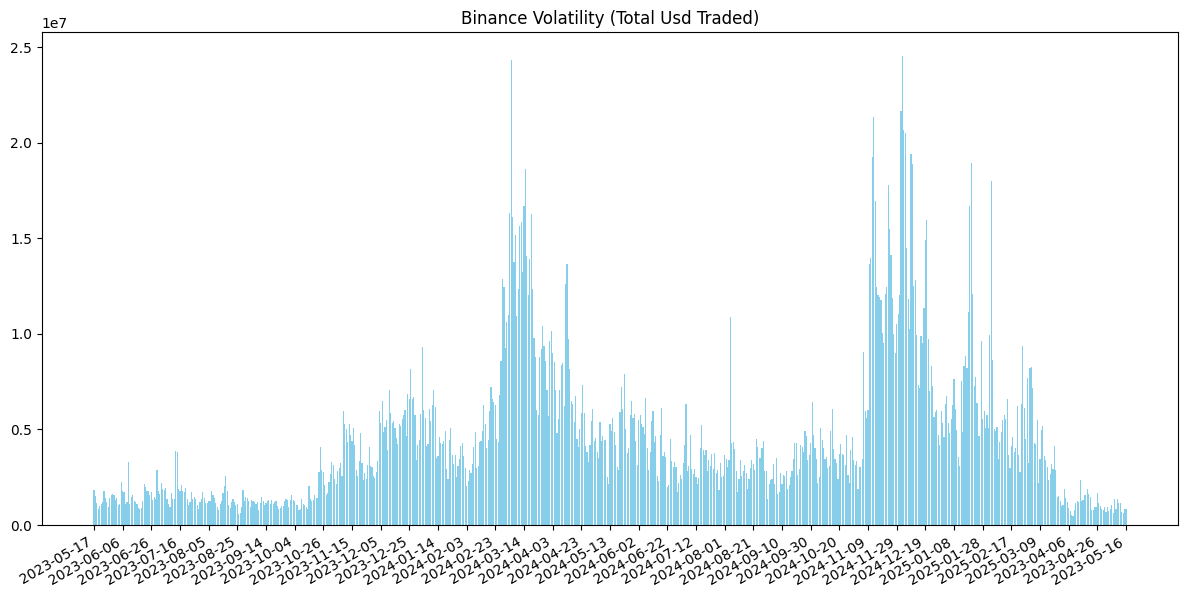

In [4]:
from datetime import datetime
from Helpers import round_
#benchmark_json
from Helpers import get_volatility_binance
start_dt=datetime(2023,1,1)
list_dts, list_volumes = get_volatility_binance(start_dt=start_dt)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(12, 6))
#ax.plot(list_dts, list_volumes)
axes.bar(list_dts, list_volumes, color='skyblue')
axes.set_xticks(list_dts[::20]) 
plt.gcf().autofmt_xdate() # Automatically rotate the date labels
plt.tight_layout()
plt.title('Binance Volatility (Total Usd Traded)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(12, 6))
#ax.plot(list_dts, list_volumes)
axes.bar(list_dts, list_volumes, color='skyblue')
axes.set_xticks(list_dts[::20]) 
plt.gcf().autofmt_xdate() # Automatically rotate the date labels
plt.tight_layout()
plt.title('Binance Volatility (Total Usd Traded)')
plt.show()

In [1]:
from Helpers import get_strategy_summary
df = get_strategy_summary(limit_n_transactions=1)
df.sort_values(by='profit', ascending=False, inplace=True)
df


/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,strategy,n_orders,profit,average_profit_per_event,commission
71,strategy_jump=0.04_limit=0.25_price_change_jump=0.025_max_limit=0.1_price_drop_limit=0.1_buy_duration=12_stop_loss_limit=None_distance_jump_to_current_price=0.01_max_ask_od_level=0.05_last_i_ask_od=1_min_n_obs_jump_level=5_lvl=3,6,1530.25,5.24,42.750
9,strategy_jump=0.04_limit=0.25_price_change_jump=0.025_max_limit=0.1_price_drop_limit=0.1_buy_duration=12_stop_loss_limit=0.05_distance_jump_to_current_price=0.01_max_ask_od_level=0.05_last_i_ask_od=1_min_n_obs_jump_level=5_lvl=3,8,1330.00,3.47,57.000
102,strategy_jump=0.04_limit=0.25_price_change_jump=0.025_max_limit=0.1_price_drop_limit=0.05_buy_duration=12_stop_loss_limit=0.05_distance_jump_to_current_price=0.05_max_ask_od_level=0.05_last_i_ask_od=1_min_n_obs_jump_level=5_lvl=3,27,1260.12,1.08,192.375
10,strategy_jump=0.04_limit=0.25_price_change_jump=0.025_max_limit=0.1_price_drop_limit=0.05_buy_duration=12_stop_loss_limit=0.05_distance_jump_to_current_price=0.05_max_ask_od_level=0.05_last_i_ask_od=3_min_n_obs_jump_level=1_lvl=3,23,876.62,0.90,163.875
0,strategy_jump=0.04_limit=0.25_price_change_jump=0.025_max_limit=0.1_price_drop_limit=0.1_buy_duration=12_stop_loss_limit=0.05_distance_jump_to_current_price=0.05_max_ask_od_level=0.05_last_i_ask_od=1_min_n_obs_jump_level=5_lvl=3,9,761.38,1.83,64.125
21,strategy_jump=0.04_limit=0.25_price_change_jump=0.025_max_limit=0.1_price_drop_limit=0.1_buy_duration=12_stop_loss_limit=0.05_distance_jump_to_current_price=0.05_max_ask_od_level=0.05_last_i_ask_od=1_min_n_obs_jump_level=1_lvl=3,9,761.38,1.83,64.125
98,strategy_jump=0.04_limit=0.25_price_change_jump=0.025_max_limit=0.1_price_drop_limit=0.05_buy_duration=12_stop_loss_limit=0.05_distance_jump_to_current_price=0.01_max_ask_od_level=0.05_last_i_ask_od=1_min_n_obs_jump_level=5_lvl=3,24,728.50,0.75,171.000
77,strategy_jump=0.04_limit=0.25_price_change_jump=0.025_max_limit=0.1_price_drop_limit=0.05_buy_duration=12_stop_loss_limit=0.05_distance_jump_to_current_price=0.05_max_ask_od_level=0.05_last_i_ask_od=1_min_n_obs_jump_level=1_lvl=3,27,620.62,0.60,192.375
12,strategy_jump=0.04_limit=0.25_price_change_jump=0.025_max_limit=0.1_price_drop_limit=0.05_buy_duration=12_stop_loss_limit=0.05_distance_jump_to_current_price=0.05_max_ask_od_level=0.05_last_i_ask_od=3_min_n_obs_jump_level=5_lvl=3,22,600.75,0.69,156.750
79,strategy_jump=0.04_limit=0.25_price_change_jump=0.025_max_limit=0.1_price_drop_limit=0.1_buy_duration=12_stop_loss_limit=0.05_distance_jump_to_current_price=0.01_max_ask_od_level=0.05_last_i_ask_od=3_min_n_obs_jump_level=5_lvl=3,5,589.88,2.50,35.625
